In [37]:
#Membros: Guilherme Guidi, Guilherme Leite, Leonardo Neves
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy import stats
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from numpy import *
import seaborn as sns


Iremos usar a regressão logística para determinar qual é o o tipo de arma mais provável de ter sido utilizada ,dado o numero de mortes de um ataque terrorista . A regressão logística é uma técnica estatística que busca fazer um modelo de predições, dado um conjunto de observações. A regressão logística diferencia-se da regressão linear pelo facto de a variável resposta ser categórica.

**Dado o número de mortes de um ataque terrorista, qual é o tipo de arma mais provavel de ter sido ultilizada.**
#Regressão Logística

In [17]:

data = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='latin1')
col = data.columns.values #Conteudo de cada coluna
col

C:\Users\Leonardo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3',
       'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3',
       'in

In [23]:
df=data[['weaptype1','nkill','nwound','weaptype1_txt']]
#for linha in range(1+len(df)):
   # print(nunndf.nkill[linha])
   # if nunndf.nkill[linha] == 0:
     #   if nunndf.nwound[linha]==0:
      #      df.drop([linha])



In [32]:
refem=data['ransom']
refem

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        1.0
28        0.0
29        0.0
         ... 
170320    NaN
170321    NaN
170322    NaN
170323    NaN
170324    NaN
170325    NaN
170326    NaN
170327    NaN
170328    NaN
170329    0.0
170330    NaN
170331    NaN
170332    NaN
170333    NaN
170334    NaN
170335    NaN
170336    NaN
170337    NaN
170338    NaN
170339    NaN
170340    NaN
170341    NaN
170342    NaN
170343    NaN
170344    NaN
170345    NaN
170346    NaN
170347    0.0
170348    NaN
170349    NaN
Name: ransom, Length: 170350, dtype: float64

In [24]:
nndf = df[pd.notnull(df.weaptype1)&pd.notnull(df.nkill)&pd.notnull(df.nwound)]#Tira os "NaN" do df
nndf.isnull().sum()
print(nndf.weaptype1[:1])

0    13
Name: weaptype1, dtype: int64


In [25]:
nunndf = nndf[nndf.weaptype1 != 13] #tira as armas "Unknown" do df

dfTr = nunndf.sample(5000) #separa as linhas que serao usadas para o treinamento
dfTe = nunndf.sample(100) #separa as linhas que serao usadas para o teste

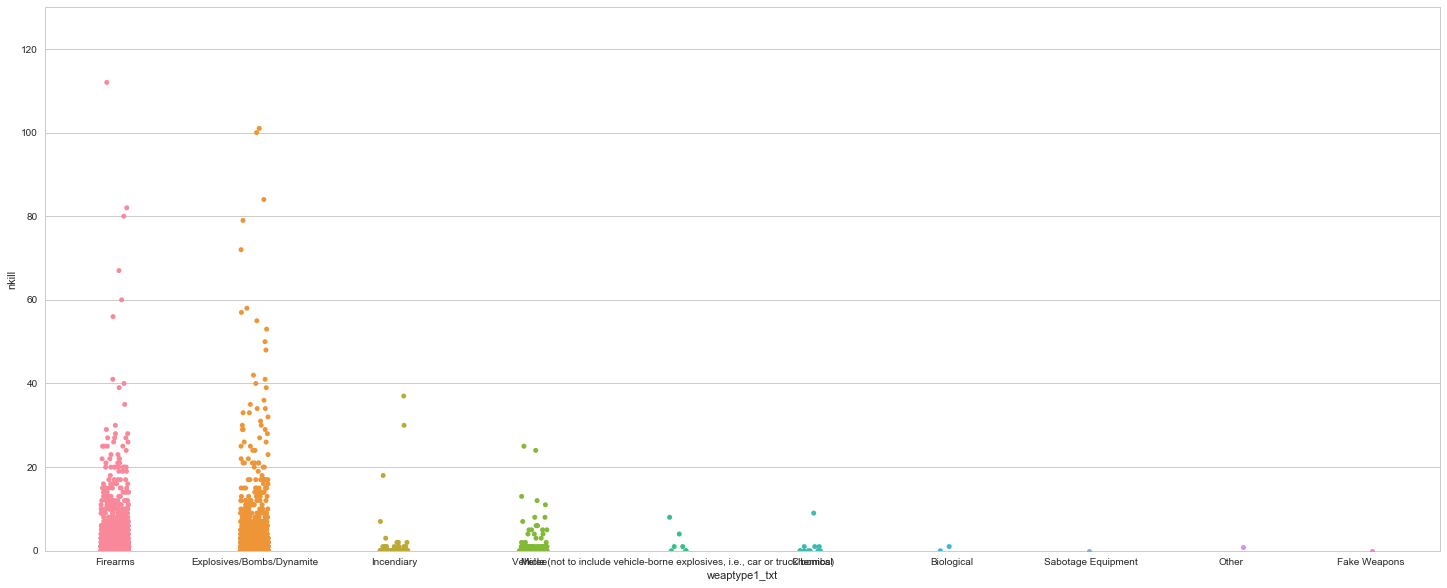

In [26]:
sns.set(style="whitegrid", color_codes=True)
a4_dims = (25, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_context("talk")
sns.plt.ylim(0, 130)# Esse intervalo contem a grande maioria dos dados, o limite foi colocado para uma mulhor compreesão da
                    # distribuição

sns.stripplot(x="weaptype1_txt", y="nkill", data=dfTr, jitter=True);


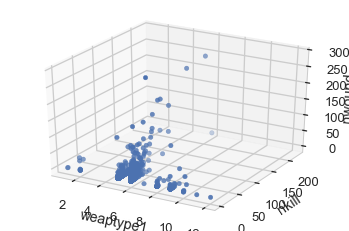

In [27]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
threedee = plt.figure().gca(projection='3d')
threedee.scatter(dfTr['weaptype1'], dfTr['nkill'], dfTr['nwound'])
threedee.set_xlabel('weaptype1')
threedee.set_ylabel('nkill')
threedee.set_zlabel('nwound')
plt.show()

In [28]:
#Z = dfTr['nwound']
Y = dfTr['weaptype1']
X = dfTr['nkill']
#Z=Z.values.reshape((len(Z),1))
X=X.values.reshape((len(X),1))
Y=Y.values.reshape((len(Y),1))


TY = dfTe['weaptype1']
TX = dfTe['nkill']
TX=TX.values.reshape((len(TX),1))
TY=TY.values.reshape((len(TY),1))

mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X,Y)
lr = linear_model.LogisticRegression()
lr.fit(X, Y)


print ("Logistic regression Train Accuracy :: ", metrics.accuracy_score(Y, lr.predict(X)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(TY, lr.predict(TX)))

print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(Y, mul_lr.predict(X)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(TY, mul_lr.predict(TX)))

C:\Users\Leonardo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic regression Train Accuracy ::  0.5588
Logistic regression Test Accuracy ::  0.51
Multinomial Logistic regression Train Accuracy ::  0.5588
Multinomial Logistic regression Test Accuracy ::  0.51


Os valores gerados pela regressão logística podem ser considerados relativamente bons. Dado que o índice de acerto do treinamento
foi por volta de 58.8% e o teste 51% e considerando também as diversas variáveis que acontecem entre cada atentado terrorista a outro, como; região, segurança do local, treinamento dos terroristas, treinamento da civil, etc...
Assim podemos confirmar que a h0, que o número de mortes de um ataque terrorista, tem relação com o tipo de arma utilizada, e assim poder aceitar também predições de que arma fora usada em um ataque dado o número de mortes.


In [29]:
#logistic_model.predict_proba(X)[:,1]

In [30]:
print ("Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, lr.predict(train_x)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, lr.predict(test_x)))

print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, mul_lr.predict(train_x)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, mul_lr.predict(test_x)))

NameError: name 'train_y' is not defined